In [222]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

In [115]:
df = pd.read_csv('train_pronto.csv')

In [116]:
df.head()

,Unnamed: 0,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,weekend,afternoon,morning,evening,night,cat_weekend,cat_weekday
0,0,20.2900,22.2900,0.00,439.00,0.003275,0,weekday,1,0,0,0,0,1
1,1,21.9725,30.0725,419.00,975.25,0.004912,1,weekday,1,0,0,0,0,1
2,2,21.1500,19.5500,0.00,497.00,0.003028,0,weekday,0,0,1,0,0,1
3,3,22.2000,34.1725,433.00,1682.75,0.005667,1,weekday,1,0,0,0,0,1
4,4,24.1000,24.1000,181.75,681.25,0.004475,0,weekday,1,0,0,0,0,1


In [117]:
df.describe()

,Unnamed: 0,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,afternoon,morning,evening,night,cat_weekend,cat_weekday
count,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000,16448.0,16448.0
mean,8223.500000,20.909264,27.667679,130.922331,690.417678,0.004231,0.231761,0.239908,0.235105,0.219723,0.305265,0.0,1.0
std,4748.272949,1.052940,4.988453,210.055475,310.628807,0.000767,0.421970,0.427040,0.424077,0.414071,0.460534,0.0,0.0
min,0.000000,19.000000,16.745000,0.000000,413.000000,0.002678,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,4111.750000,20.200000,24.500000,0.000000,460.937500,0.003721,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,8223.500000,20.700000,27.315000,0.000000,565.500000,0.004292,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
75%,12335.250000,21.533333,31.290000,305.000000,804.500000,0.004834,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.0
max,16447.000000,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0


In [118]:
df.drop(['weekend', 'Unnamed: 0'], axis = 1, inplace = True)

## LINEAR REGRESSION

In [119]:
y_name = 'Occupancy'
attributes = [col for col in df.columns if col != y_name]
X = df[attributes].values
y = df[y_name]

In [120]:
reg = LinearRegression()
'''num = []
for i in range(2,20):
    num.append(i)
scoring_mae = []
scoring_r2 = []
scoring_mse = []
for j in num:
    cv_score_mae = cross_val_score(reg, X, y, cv = j, scoring = 'neg_mean_absolute_error').mean()
    cv_score_mae = -1*cv_score_mae
    scoring_mae.append(cv_score_mae)
    cv_score_r2 = cross_val_score(reg, X, y, cv = j, scoring = 'r2').mean()
    scoring_r2.append(cv_score_r2)
    cv_score_mse = cross_val_score(reg, X, y, cv = j, scoring = 'neg_mean_squared_error').mean()
    cv_score_mse = -1*cv_score_mse
    scoring_mse.append(cv_score_mse))'''


"num = []\nfor i in range(2,20):\n    num.append(i)\nscoring_mae = []\nscoring_r2 = []\nscoring_mse = []\nfor j in num:\n    cv_score_mae = cross_val_score(reg, X, y, cv = j, scoring = 'neg_mean_absolute_error').mean()\n    cv_score_mae = -1*cv_score_mae\n    scoring_mae.append(cv_score_mae)\n    cv_score_r2 = cross_val_score(reg, X, y, cv = j, scoring = 'r2').mean()\n    scoring_r2.append(cv_score_r2)\n    cv_score_mse = cross_val_score(reg, X, y, cv = j, scoring = 'neg_mean_squared_error').mean()\n    cv_score_mse = -1*cv_score_mse\n    scoring_mse.append(cv_score_mse))"

In [121]:
'''plt.plot(scoring_mae, color = 'b', label = 'MAE')
plt.plot(scoring_r2, color = 'r', label = 'R2')
plt.plot(scoring_mse, color = 'g', label = 'MSE')
plt.xlabel('number of cross validation')
plt.ylabel('R2, MAE, MSE')
plt.legend()
plt.title('R2, MAE, MSE trend with linear regression')
plt.grid()
plt.xticks(num)
plt.show()'''

"plt.plot(scoring_mae, color = 'b', label = 'MAE')\nplt.plot(scoring_r2, color = 'r', label = 'R2')\nplt.plot(scoring_mse, color = 'g', label = 'MSE')\nplt.xlabel('number of cross validation')\nplt.ylabel('R2, MAE, MSE')\nplt.legend()\nplt.title('R2, MAE, MSE trend with linear regression')\nplt.grid()\nplt.xticks(num)\nplt.show()"

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [123]:
reg = reg.fit(X_train, y_train)

In [124]:


print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-2.64256503e-01 -1.03732918e-01  2.07387920e-03  1.48618458e-04
  6.77738296e+02  4.39402274e-02 -6.25087836e-02  1.94105118e-02
 -8.41954481e-04  0.00000000e+00  0.00000000e+00]
Intercept: 
 5.387151567366853


In [125]:
y_pred = reg.predict(X_test)

In [126]:
y_pred.shape

(4935,)

In [127]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.874
MSE: 0.022
MAE: 0.088


## CROSS VALIDATION 

In [128]:
scores = cross_val_score(reg, X, y, cv=3, scoring = 'r2')
scores.mean()

0.8822222837960525

In [129]:
X_train.T[4].min()

0.00267789158376215

In [130]:
X_train.T[4].max()

0.00647601323671025

In [131]:
df.HumidityRatio.min()

0.00267789158376215

In [132]:
df.HumidityRatio.max()

0.00647601323671025

## LINEAR REGRESSION IN TWO DIMENSIONS FOR EACH ATTRIBUTE AND OCCUPANCY

### TEMPERATURE

In [133]:
reg = LinearRegression()
reg.fit(X_train.T[0].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.296
MSE: 0.125
MAE: 0.270


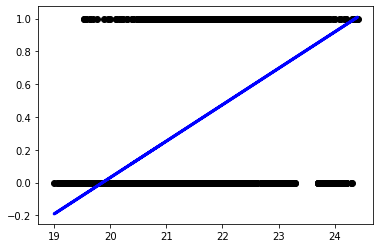

In [134]:
plt.scatter(X_test.T[0], y_test,  color='black')
plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3)
plt.show()

### HUMIDITY

In [135]:
reg = LinearRegression()
reg.fit(X_train.T[1].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[1].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.003
MSE: 0.177
MAE: 0.355


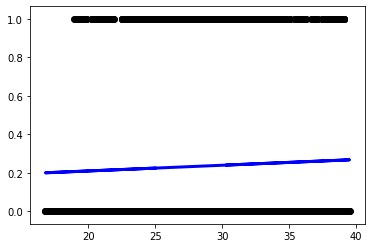

In [136]:
plt.scatter(X_test.T[1], y_test,  color='black')
plt.plot(X_test.T[1], y_pred, color='blue', linewidth=3)
plt.show()

### LIGHT

In [137]:
reg = LinearRegression()
reg.fit(X_train.T[2].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[2].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.833
MSE: 0.030
MAE: 0.084


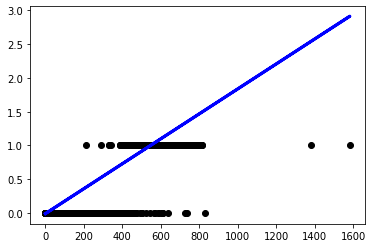

In [138]:
plt.scatter(X_test.T[2], y_test,  color='black')
plt.plot(X_test.T[2], y_pred, color='blue', linewidth=3)
plt.show()

### CO2

In [139]:
reg = LinearRegression()
reg.fit(X_train.T[3].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[3].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.249
MSE: 0.133
MAE: 0.268


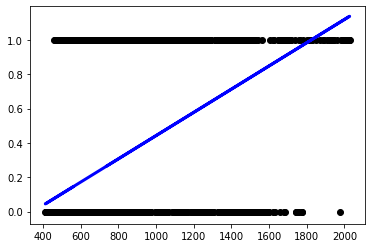

In [140]:
plt.scatter(X_test.T[3], y_test,  color='black')
plt.plot(X_test.T[3], y_pred, color='blue', linewidth=3)
plt.show()

### HUMIDITY RATIO

In [141]:
reg = LinearRegression()
reg.fit(X_train.T[4].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[4].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.068
MSE: 0.165
MAE: 0.333


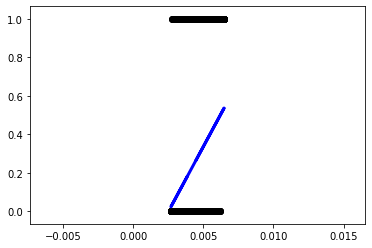

In [142]:
plt.scatter(X_test.T[4], y_test,  color='black')
plt.plot(X_test.T[4], y_pred, color='blue', linewidth=3)
plt.show()

## LASSO

In [143]:
reg = Lasso()
'''num = []
for i in range(2,20):
    num.append(i)
scoring_mae = []
scoring_r2 = []
scoring_mse = []
for j in num:
    cv_score_mae = cross_val_score(reg, X, y, cv = j, scoring = 'neg_mean_absolute_error').mean()
    cv_score_mae = -1*cv_score_mae
    scoring_mae.append(cv_score_mae)
    cv_score_r2 = cross_val_score(reg, X, y, cv = j, scoring = 'r2').mean()
    scoring_r2.append(cv_score_r2)
    cv_score_mse = cross_val_score(reg, X, y, cv = j, scoring = 'neg_mean_squared_error').mean()
    cv_score_mse = -1*cv_score_mse
    scoring_mse.append(cv_score_mse)'''

"num = []\nfor i in range(2,20):\n    num.append(i)\nscoring_mae = []\nscoring_r2 = []\nscoring_mse = []\nfor j in num:\n    cv_score_mae = cross_val_score(reg, X, y, cv = j, scoring = 'neg_mean_absolute_error').mean()\n    cv_score_mae = -1*cv_score_mae\n    scoring_mae.append(cv_score_mae)\n    cv_score_r2 = cross_val_score(reg, X, y, cv = j, scoring = 'r2').mean()\n    scoring_r2.append(cv_score_r2)\n    cv_score_mse = cross_val_score(reg, X, y, cv = j, scoring = 'neg_mean_squared_error').mean()\n    cv_score_mse = -1*cv_score_mse\n    scoring_mse.append(cv_score_mse)"

In [144]:
'''plt.plot(scoring_mae, color = 'b', label = 'MAE')
plt.plot(scoring_r2, color = 'r', label = 'R2')
plt.plot(scoring_mse, color = 'g', label = 'MSE')
plt.xlabel('number of cross validation')
plt.ylabel('R2, MAE, MSE')
plt.legend()
plt.title('R2, MAE, MSE trend with lasso regression')
plt.xticks(num)
plt.grid()
plt.show()'''

"plt.plot(scoring_mae, color = 'b', label = 'MAE')\nplt.plot(scoring_r2, color = 'r', label = 'R2')\nplt.plot(scoring_mse, color = 'g', label = 'MSE')\nplt.xlabel('number of cross validation')\nplt.ylabel('R2, MAE, MSE')\nplt.legend()\nplt.title('R2, MAE, MSE trend with lasso regression')\nplt.xticks(num)\nplt.grid()\nplt.show()"

In [145]:
y_name = 'Occupancy'
attributes = [col for col in df.columns if col != y_name]
X = df[attributes].values
y = df[y_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [146]:
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.          0.          0.00173042  0.00014567  0.          0.
 -0.          0.          0.          0.          0.        ]
Intercept: 
 -0.09440833949427713


In [147]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.842
MSE: 0.028
MAE: 0.092


## CROSS VALIDATION

In [148]:
scores = cross_val_score(reg, X, y, cv=3, scoring = 'r2')
scores.mean()

0.8504096619308522

### LASSO REGRESSION IN TWO DIMENSIONS FOR EACH ATTRIBUTE AND OCCUPANCY

#### TEMPERATURE

In [149]:
reg.fit(X_train.T[0].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 0.177
MAE: 0.356


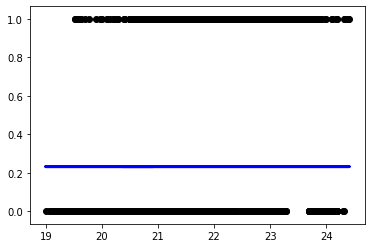

In [150]:
plt.scatter(X_test.T[0], y_test,  color='black')
plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3)
plt.show()

### HUMIDITY

In [151]:
reg.fit(X_train.T[1].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[1].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 0.177
MAE: 0.356


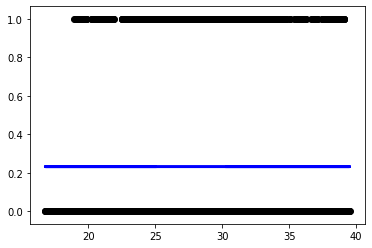

In [152]:
plt.scatter(X_test.T[1], y_test,  color='black')
plt.plot(X_test.T[1], y_pred, color='blue', linewidth=3)
plt.show()

### LIGHT

In [153]:
reg.fit(X_train.T[2].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[2].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.833
MSE: 0.030
MAE: 0.084


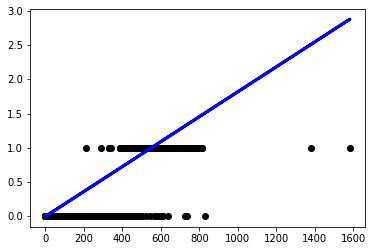

In [154]:
plt.scatter(X_test.T[2], y_test,  color='black')
plt.plot(X_test.T[2], y_pred, color='blue', linewidth=3)
plt.show()

### CO2

In [155]:
reg.fit(X_train.T[3].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[3].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.249
MSE: 0.133
MAE: 0.270


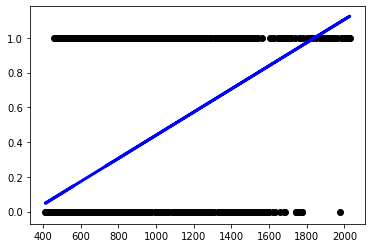

In [156]:
plt.scatter(X_test.T[3], y_test,  color='black')
plt.plot(X_test.T[3], y_pred, color='blue', linewidth=3)
plt.show()

### HUMIDITY RATIO

In [157]:
reg.fit(X_train.T[4].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[4].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 0.177
MAE: 0.356


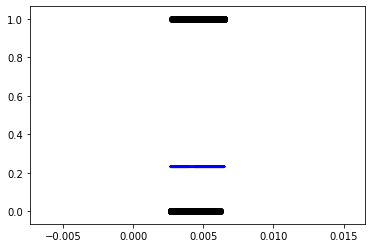

In [158]:
plt.scatter(X_test.T[4], y_test,  color='black')
plt.plot(X_test.T[4], y_pred, color='blue', linewidth=3)
plt.show()

## RIDGE REGRESSION

In [159]:
reg = Ridge()
'''num = []
for i in range(2,20):
    num.append(i)
scoring_mae = []
scoring_r2 = []
scoring_mse = []
for j in num:
    cv_score_mae = cross_val_score(reg, X, y, cv = j, scoring = 'neg_mean_absolute_error').mean()
    cv_score_mae = -1*cv_score_mae
    scoring_mae.append(cv_score_mae)
    cv_score_r2 = cross_val_score(reg, X, y, cv = j, scoring = 'r2').mean()
    scoring_r2.append(cv_score_r2)
    cv_score_mse = cross_val_score(reg, X, y, cv = j, scoring = 'neg_mean_squared_error').mean()
    cv_score_mse = -1*cv_score_mse
    scoring_mse.append(cv_score_mse)'''

"num = []\nfor i in range(2,20):\n    num.append(i)\nscoring_mae = []\nscoring_r2 = []\nscoring_mse = []\nfor j in num:\n    cv_score_mae = cross_val_score(reg, X, y, cv = j, scoring = 'neg_mean_absolute_error').mean()\n    cv_score_mae = -1*cv_score_mae\n    scoring_mae.append(cv_score_mae)\n    cv_score_r2 = cross_val_score(reg, X, y, cv = j, scoring = 'r2').mean()\n    scoring_r2.append(cv_score_r2)\n    cv_score_mse = cross_val_score(reg, X, y, cv = j, scoring = 'neg_mean_squared_error').mean()\n    cv_score_mse = -1*cv_score_mse\n    scoring_mse.append(cv_score_mse)"

In [160]:
'''plt.plot(scoring_mae, color = 'b', label = 'MAE')
plt.plot(scoring_r2, color = 'r', label = 'R2')
plt.plot(scoring_mse, color = 'g', label = 'MSE')
plt.xlabel('number of cross validation')
plt.ylabel('R2, MAE, MSE')
plt.legend()
plt.title('R2, MAE, MSE trend with lasso regression')
plt.xticks(num)
plt.grid()
plt.show()'''

"plt.plot(scoring_mae, color = 'b', label = 'MAE')\nplt.plot(scoring_r2, color = 'r', label = 'R2')\nplt.plot(scoring_mse, color = 'g', label = 'MSE')\nplt.xlabel('number of cross validation')\nplt.ylabel('R2, MAE, MSE')\nplt.legend()\nplt.title('R2, MAE, MSE trend with lasso regression')\nplt.xticks(num)\nplt.grid()\nplt.show()"

In [161]:
y_name = 'Occupancy'
attributes = [col for col in df.columns if col != y_name]
X = df[attributes].values
y = df[y_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


In [162]:
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.09725129 -0.00172749  0.00209052  0.00019518  0.01148226  0.05395205
 -0.07302217  0.02103967 -0.00196955  0.          0.        ]
Intercept: 
 1.9057371794092526


In [163]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.870
MSE: 0.023
MAE: 0.091


## CROSS VALIDATION

In [164]:
scores = cross_val_score(reg, X, y, cv=3, scoring = 'r2')
scores.mean()

0.878251939397163

## RIDGE REGRESSION IN TWO DIMENSIONS FOR EACH ATTRIBUTE AND OCCUPANCY

### TEMPERATURE

In [165]:
reg.fit(X_train.T[0].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.296
MSE: 0.125
MAE: 0.270


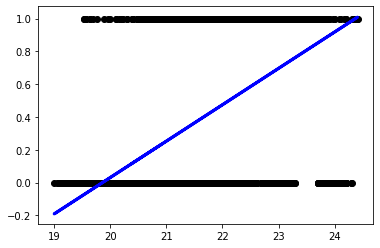

In [166]:
plt.scatter(X_test.T[0], y_test,  color='black')
plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3)
plt.show()

### HUMIDITY

In [167]:
reg.fit(X_train.T[1].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[1].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.003
MSE: 0.177
MAE: 0.355


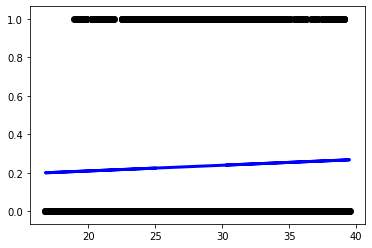

In [168]:
plt.scatter(X_test.T[1], y_test,  color='black')
plt.plot(X_test.T[1], y_pred, color='blue', linewidth=3)
plt.show()

### LIGHT

In [169]:
reg.fit(X_train.T[2].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[2].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.833
MSE: 0.030
MAE: 0.084


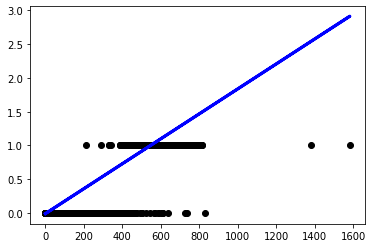

In [170]:
plt.scatter(X_test.T[2], y_test,  color='black')
plt.plot(X_test.T[2], y_pred, color='blue', linewidth=3)
plt.show()

### CO2

In [171]:
reg.fit(X_train.T[3].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[3].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.249
MSE: 0.133
MAE: 0.268


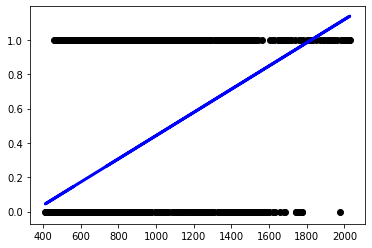

In [172]:
plt.scatter(X_test.T[3], y_test,  color='black')
plt.plot(X_test.T[3], y_pred, color='blue', linewidth=3)
plt.show()

### HUMIDITY RATIO

In [173]:
reg.fit(X_train.T[4].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[4].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.001
MSE: 0.177
MAE: 0.356


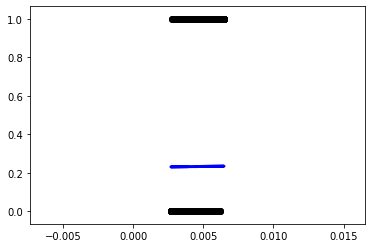

In [174]:
plt.scatter(X_test.T[4], y_test,  color='black')
plt.plot(X_test.T[4], y_pred, color='blue', linewidth=3)
plt.show()

In [175]:
### DA TUTTO STO BORDELLO VEDIAMO CHE LIGHT E CO2 SONO I PARAMETRI CHE MEGLIO SI APPLICANO PER I VARI TIPI DI REGRESSIONE

### LOGISTIC REGRESSION

In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
y_name = 'Occupancy'
attributes = [col for col in df.columns if col != y_name]
X = df[attributes].values
y = df[y_name]

In [181]:
clf = LogisticRegression()
'''num = []
for i in range(2,20):
    num.append(i)
scoring_accuracy = []
scoring_precision = []
scoring_recall = []
for j in num:
    cv_score_accuracy = cross_val_score(clf, X, y, cv = j, scoring = 'accuracy').mean()
    scoring_accuracy.append(cv_score_accuracy)
    cv_score_precision = cross_val_score(clf, X, y, cv = j, scoring = 'precision').mean()
    scoring_precision.append(cv_score_precision)
    cv_score_recall = cross_val_score(clf, X, y, cv = j, scoring = 'recall').mean()
    scoring_recall.append(cv_score_recall)'''

"num = []\nfor i in range(2,20):\n    num.append(i)\nscoring_accuracy = []\nscoring_precision = []\nscoring_recall = []\nfor j in num:\n    cv_score_accuracy = cross_val_score(clf, X, y, cv = j, scoring = 'accuracy').mean()\n    scoring_accuracy.append(cv_score_accuracy)\n    cv_score_precision = cross_val_score(clf, X, y, cv = j, scoring = 'precision').mean()\n    scoring_precision.append(cv_score_precision)\n    cv_score_recall = cross_val_score(clf, X, y, cv = j, scoring = 'recall').mean()\n    scoring_recall.append(cv_score_recall)"

In [182]:
'''plt.plot(scoring_accuracy, color = 'b', label = 'Accuracy')
plt.plot(scoring_precision, color = 'r', label = 'Precision')
plt.plot(scoring_recall, color = 'g', label = 'Recall')
plt.xlabel('number of cross validation')
plt.ylabel('Accuracy, Precision, Recall')
plt.legend()
plt.title('Accuracy, Precision, Recall with different cross validation values')
plt.xticks(num)
plt.grid()
plt.show()'''

"plt.plot(scoring_accuracy, color = 'b', label = 'Accuracy')\nplt.plot(scoring_precision, color = 'r', label = 'Precision')\nplt.plot(scoring_recall, color = 'g', label = 'Recall')\nplt.xlabel('number of cross validation')\nplt.ylabel('Accuracy, Precision, Recall')\nplt.legend()\nplt.title('Accuracy, Precision, Recall with different cross validation values')\nplt.xticks(num)\nplt.grid()\nplt.show()"

### LIGHT

In [183]:
selected_columns = ['Light']
class_name = 'Occupancy'
attributes = [col for col in df.columns if col != class_name]
X = df[selected_columns].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [184]:
X.shape

(16448, 1)

In [185]:
X_train.shape

(11513, 1)

In [186]:
y_train.shape

(11513,)

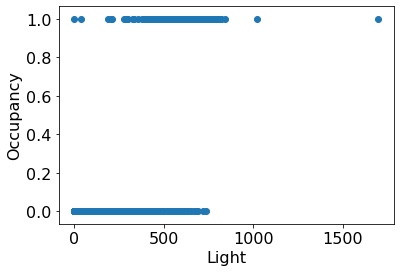

In [187]:
plt.scatter(X_train.T[0], y_train)
plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [188]:
from sklearn.linear_model import LogisticRegression

In [189]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [190]:
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([('classifier' , LogisticRegression())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['newton-cg', 'lbfgs','sag', 'saga','liblinear']},
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 7, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 7 folds for each of 400 candidates, totalling 2800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 841 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2453 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2800 out of 2800 | elapsed:  5.9min finished
C:\Users\Ale\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


In [191]:
print(best_clf.best_estimator_)

Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=0.0001, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='newton-cg', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)


In [192]:
# extract best estimator

clf = LogisticRegression(C = 0.0001, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, l1_ratio = None, 
                         max_iter = 100, multi_class = 'auto', n_jobs = None, penalty = 'l2', random_state = 0, solver = 'newton-cg', tol = 0.0001, verbose = 0, warm_start = False)
# to test the bestfit
print(best_clf.score(X_test, y_test))
best_clf = clf.fit(X_train, y_train)

0.9870314083080041


## CROSS VALIDATION

In [194]:
scores = cross_val_score(clf, X, y, cv=3, scoring = 'precision')
scores.mean()

0.9523621224852125

In [196]:
scores = cross_val_score(clf, X, y, cv=3, scoring = 'accuracy')
scores.mean()

0.987475544067765

In [198]:
scores = cross_val_score(clf, X, y, cv=3, scoring = 'recall')
scores.mean()

0.9958023834746856

In [ ]:

0.9823986901350799

In [199]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9870314083080041
F1-score [0.99149615 0.97269625]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3791
           1       0.95      1.00      0.97      1144

    accuracy                           0.99      4935
   macro avg       0.97      0.99      0.98      4935
weighted avg       0.99      0.99      0.99      4935



In [ ]:
Accuracy 0.9823986901350799
F1-score [0.98872279 0.95992544]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1924
           1       0.93      0.99      0.96       519

    accuracy                           0.98      2443
   macro avg       0.96      0.99      0.97      2443
weighted avg       0.98      0.98      0.98      2443

In [200]:
from scipy.special import expit

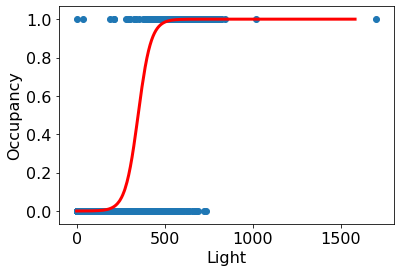

In [201]:
loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test.T[0]), loss, color='red', linewidth=3)
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### CO2

In [202]:
selected_columns = ['CO2']
class_name = 'Occupancy'
attributes = [col for col in df.columns if col != class_name]
X = df[selected_columns].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

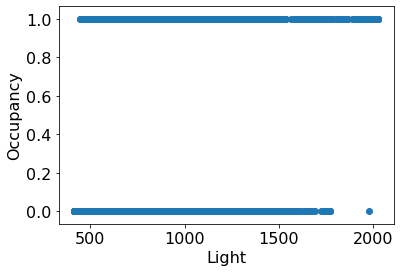

In [203]:
plt.scatter(X_train.T[0], y_train)
plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [204]:
#GRIDSEARCH

pipe = Pipeline([('classifier' , LogisticRegression())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['newton-cg', 'lbfgs','sag', 'saga','liblinear']},
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.2min finished


In [205]:
print(best_clf.best_estimator_)

Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=0.0001, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='newton-cg', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)


In [206]:
# extract best estimator

clf = LogisticRegression(C = 0.0001, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, l1_ratio = None, 
                         max_iter = 100, multi_class = 'auto', n_jobs = None, penalty = 'l2', random_state = 0, solver = 'newton-cg', tol = 0.0001, verbose = 0, warm_start = False)
# to test the bestfit
print(best_clf.score(X_test, y_test))
best_clf = clf.fit(X_train, y_train)

0.7848024316109422


In [207]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7848024316109422
F1-score [0.86953317 0.38612717]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3791
           1       0.57      0.29      0.39      1144

    accuracy                           0.78      4935
   macro avg       0.69      0.61      0.63      4935
weighted avg       0.76      0.78      0.76      4935



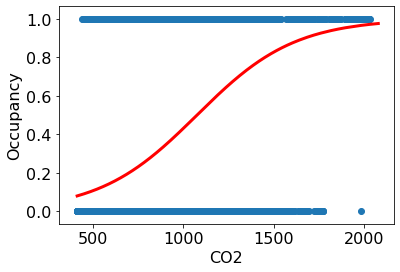

In [208]:
loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test.T[0]), loss, color='red', linewidth=3)
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### FACCIO UNA PROVA CON UN ATTRIBUTO CHE NON FITTAVA BENE CON LE REGRESSIONI LINEARI

In [209]:
selected_columns = ['Humidity']
class_name = 'Occupancy'
attributes = [col for col in df.columns if col != class_name]
X = df[selected_columns].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

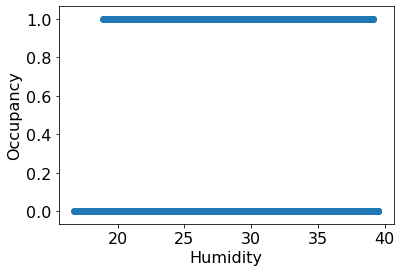

In [210]:
plt.scatter(X_train.T[0], y_train)
plt.xlabel('Humidity', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [211]:
# GRIDSEARCH
pipe = Pipeline([('classifier' , LogisticRegression())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['newton-cg', 'lbfgs','sag', 'saga','liblinear']},
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 1328 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.1min finished


In [212]:
print(best_clf.best_estimator_)

Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=0.0001, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)


In [213]:
# extract best estimator

clf = LogisticRegression(C = 0.0001, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, l1_ratio = None, 
                         max_iter = 100, multi_class = 'auto', n_jobs = None, penalty = 'l2', random_state = 0, solver = 'newton-cg', tol = 0.0001, verbose = 0, warm_start = False)
# to test the bestfit
print(best_clf.score(X_test, y_test))
best_clf = clf.fit(X_train, y_train)

0.7681864235055724


In [214]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7681864235055724
F1-score [0.86889755 0.        ]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3791
           1       0.00      0.00      0.00      1144

    accuracy                           0.77      4935
   macro avg       0.38      0.50      0.43      4935
weighted avg       0.59      0.77      0.67      4935



C:\Users\Ale\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


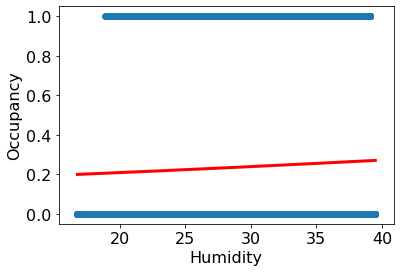

In [215]:
loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test.T[0]), loss, color='red', linewidth=3)
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## ROC CURVE

In [218]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

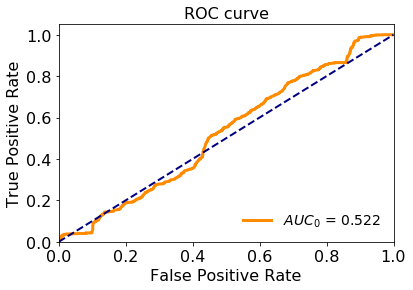

In [219]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

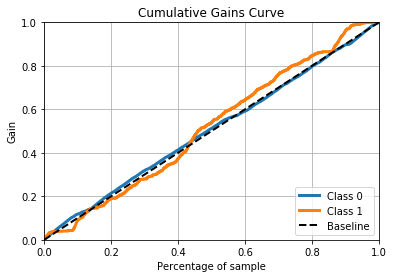

In [223]:

plot_cumulative_gain(y_test, y_score)
plt.show()

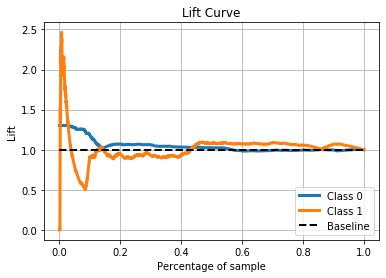

In [224]:
plot_lift_curve(y_test, y_score)
plt.show()

# PROVE ANDATE MALE, DIO MALEDETTO

### MULTIPLE LINEAR REGRESSION

In [85]:
df.head()

,Light,CO2,Humidity,Occupancy
0,426.0,721.25,27.2720,1
1,429.5,714.00,27.2675,1
2,426.0,713.50,27.2450,1
3,426.0,708.25,27.2000,1
4,426.0,704.50,27.2000,1


In [86]:
df = df[['Light', 'CO2', 'Occupancy']]

In [89]:
mlr = LinearRegression(normalize = True)

In [110]:
mlr_ = mlr.fit(df[['Light','CO2']], df['Occupancy'])

In [111]:
# Get the slope and intercept of the line best fit.
print(mlr_.intercept_)

print(mlr_.coef_)

-0.13759717015035478
[0.00163172 0.00025539]


In [95]:
x = df[['Light', 'CO2']].values
y = df.Occupancy.values

In [176]:
x_surf, y_surf = np.meshgrid(np.linspace(int(df.Light.min()), int(df.Light.max())), np.linspace(int(df.CO2.min()), int(df.CO2.max())))
only_x = pd.DataFrame({'Light': x_surf.ravel(), 'CO2' : y_surf.ravel()})
fitted_y = mlr_.predict(only_x)

In [177]:
fitted_y = np.array(fitted_y)

AttributeError: 'AxesSubplot' object has no attribute 'plot_surface'

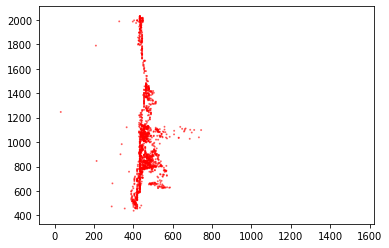

In [178]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['Light'], df['CO2'], df['Occupancy'], c = 'red', marker = 'o', alpha = 0.5)
ax.plot_surface(x_surf, y_surf, fitted_y.reshape(x_surf.shape), color = 'None', alpha = 0.3)
ax.set_xlabel('Light')
ax.set_ylabel('CO2')
ax.set_zlabel('Occupancy')
plt.show()

In [179]:
# two arrays - one for each axis
x = np.arange(df.Light.min(), df.Light.max())
y = np.arange(df.CO2.min(), df.CO2.max())

# create a mesh / matrix like object from the arrays
X, Y = np.meshgrid(x, y)
# create Z values - also in a mesh like shape
s = mlr_.intercept_, df.Light.values*mlr_.coef_[0], df.CO2.values*mlr_.coef_[1]
Z = np.sum(s)
# plot!
surface = ax.plot_surface(X, Y, Z)

AttributeError: 'AxesSubplot' object has no attribute 'plot_surface'